# Data analysis

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from typing import List

In [27]:
sns.set_style('whitegrid')
sns.set_theme(style="white")
plt.figure(figsize=(16, 6))
%matplotlib inline

## Import data

In [3]:
path_to_training_set = Path('../data/train.csv')
path_to_test_set = Path('../data/test.csv')

In [5]:
df_train_raw = pd.read_csv(path_to_training_set)
df_test_raw = pd.read_csv(path_to_test_set)

## Basic information - Training data

In [7]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
df_train_raw.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [9]:
df_train_raw.shape

(31390, 5)

## Basic information - Test data

In [11]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   seq_id            2413 non-null   int64 
 1   protein_sequence  2413 non-null   object
 2   pH                2413 non-null   int64 
 3   data_source       2413 non-null   object
dtypes: int64(2), object(2)
memory usage: 75.5+ KB


In [12]:
df_test_raw.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [13]:
df_test_raw.shape

(2413, 4)

## Visual and statistical analysis - Training data

In [59]:
def get_stats(series: pd.Series) -> None:
    print(f'Mean: {series.mean()}')
    print(f'Median: {series.median()}')
    print(f'Min: {series.min()}')
    print(f'Max: {series.max()}')
    print(f'Unique values: {series.nunique()}')
    print(f'Missing values: {series.isnull().sum()}')

### Melting point

Text(0.5, 6.799999999999979, 'Melting point - TM')

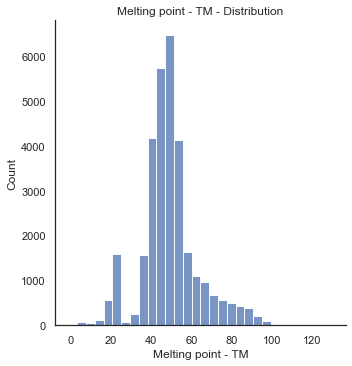

In [35]:
sns.displot(df_train_raw, x='tm', bins=30)
plt.title('Melting point - TM - Distribution')
plt.xlabel('Melting point - TM')

In [60]:
get_stats(df_train_raw.tm)

Mean: 49.14733673144313
Median: 48.0
Min: -1.0
Max: 130.0
Unique values: 770
Missing values: 0


### pH

(0.0, 16.0)

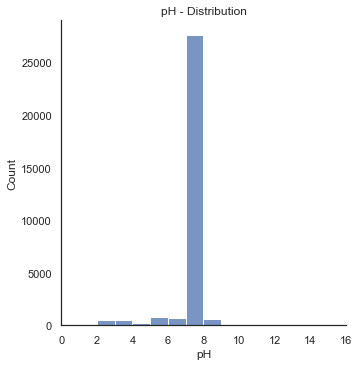

In [47]:
sns.displot(df_train_raw, x='pH', bins=np.arange(0, 16))
plt.title('pH - Distribution')
plt.xlabel('pH')
plt.xlim(0, 16)

In [61]:
get_stats(df_train_raw.pH)

Mean: 6.892339248971194
Median: 7.0
Min: 1.99
Max: 64.9
Unique values: 115
Missing values: 286


### Protein sequence length

In [65]:
seq_len = pd.Series([len(seq) for seq in df_train_raw.protein_sequence])

(0.0, 3000.0)

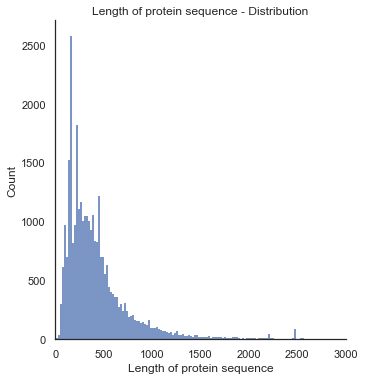

In [66]:
sns.displot(seq_len)
plt.title('Length of protein sequence - Distribution')
plt.xlabel('Length of protein sequence')
plt.xlim(0, 3000)

In [68]:
get_stats(seq_len)

Mean: 447.66951258362536
Median: 336.0
Min: 5
Max: 32767
Unique values: 1965
Missing values: 0


In [70]:
seq_len.quantile([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99, 0.995])

0.005      56.00
0.010      66.00
0.050     101.00
0.100     139.00
0.200     164.00
0.300     229.00
0.400     272.00
0.500     336.00
0.600     402.00
0.700     473.00
0.800     590.00
0.900     838.00
0.950    1120.00
0.980    1697.22
0.990    2242.00
0.995    2536.22
dtype: float64

### Protein sequences

In [96]:
%%capture

def split_sequence_and_accumulate(seq: str, accumulator: List[str]) -> List[str]:
    accumulator += [p for p in seq]

split_seq = []
df_train_raw.protein_sequence.apply(lambda sequence: split_sequence_and_accumulate(sequence, split_seq))

In [90]:
split_seq_series = pd.Series(split_seq)

In [92]:
split_seq_series.value_counts()

L    1317330
A    1076601
E    1023323
S    1010021
G     939677
V     918075
K     885207
D     780992
T     758905
I     746069
R     745753
P     707293
Q     610147
N     591608
F     520503
Y     416436
M     323506
H     315796
C     207350
W     157754
dtype: int64

Text(0.5, 6.799999999999979, 'Amino acid')

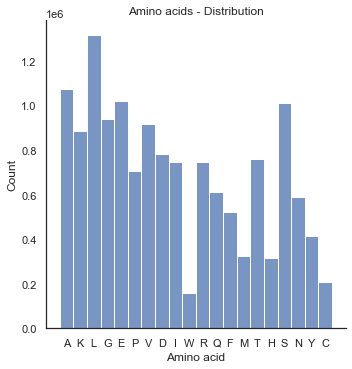

In [99]:
sns.displot(split_seq_series)
plt.title('Amino acids - Distribution')
plt.xlabel('Amino acid')

## Visual and statistical analysis - Test data

### pH

(0.0, 16.0)

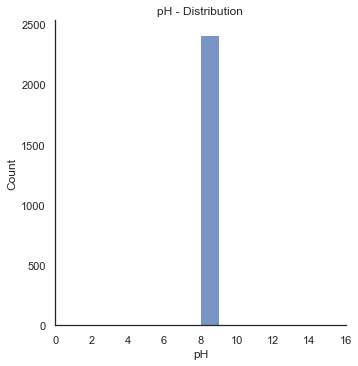

In [102]:
sns.displot(df_test_raw, x='pH', bins=np.arange(0, 16))
plt.title('pH - Distribution')
plt.xlabel('pH')
plt.xlim(0, 16)

In [103]:
get_stats(df_test_raw.pH)

Mean: 8.0
Median: 8.0
Min: 8
Max: 8
Unique values: 1
Missing values: 0


### Protein sequence length

In [104]:
seq_len_test = pd.Series([len(seq) for seq in df_test_raw.protein_sequence])

(0.0, 3000.0)

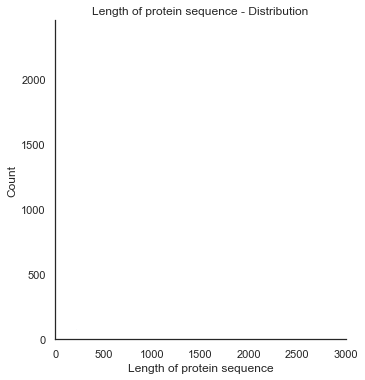

In [105]:
sns.displot(seq_len_test)
plt.title('Length of protein sequence - Distribution')
plt.xlabel('Length of protein sequence')
plt.xlim(0, 3000)

In [106]:
get_stats(seq_len_test)

Mean: 220.9680895151264
Median: 221.0
Min: 220
Max: 221
Unique values: 2
Missing values: 0


In [107]:
seq_len_test.quantile([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99, 0.995])

0.005    220.0
0.010    220.0
0.050    221.0
0.100    221.0
0.200    221.0
0.300    221.0
0.400    221.0
0.500    221.0
0.600    221.0
0.700    221.0
0.800    221.0
0.900    221.0
0.950    221.0
0.980    221.0
0.990    221.0
0.995    221.0
dtype: float64

### Protein sequences

In [112]:
%%capture

def split_sequence_and_accumulate(seq: str, accumulator: List[str]) -> List[str]:
    accumulator += [p for p in seq]

split_seq_test = []
df_test_raw.protein_sequence.apply(lambda sequence: split_sequence_and_accumulate(sequence, split_seq_test))

In [113]:
split_seq_series_test = pd.Series(split_seq_test)

In [114]:
split_seq_series_test.value_counts()

K    57702
A    52964
N    45745
G    45711
S    43322
P    40975
D    36167
V    31385
Q    31284
L    26531
F    24175
T    19343
E    16955
W    14545
I    14536
Y    14534
C     9782
R     7299
M      123
H      118
dtype: int64

Text(0.5, 6.799999999999979, 'Amino acid')

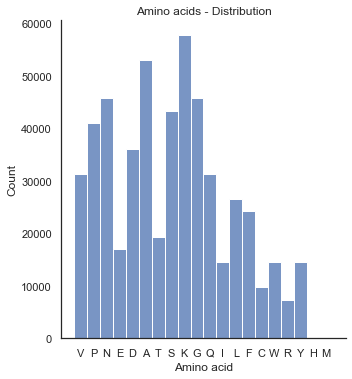

In [115]:
sns.displot(split_seq_series_test)
plt.title('Amino acids - Distribution')
plt.xlabel('Amino acid')